You can view this notebook on Google Colab

[https://colab.research.google.com/drive/1JN7k1UPxejAWt6ch4xNg6MoE-REiNZMG?usp=sharing](https://colab.research.google.com/drive/1JN7k1UPxejAWt6ch4xNg6MoE-REiNZMG?usp=sharing)

In [1]:
import numpy as np
import matplotlib.pylab as plt

# الف

In [29]:
def sin_func(N, M, t):
    return np.sin((2 * np.pi * M / N) * t)

def cos_func(N, M, t):
    return np.cos((2 * np.pi * M / N) * t)

# ب

In [3]:
def rect(N, t):
    if t < N/4 or t > 3*N/4: return 0
    return 1

def rect_func(N, t):
    return np.vectorize(lambda a: rect(N, a))(t)
    

# پ

In [4]:
def plot(t, function, name):
    plt.plot(t, function)
    plt.xlabel('t')
    plt.ylabel(f'({name})(t)')
    plt.axis('tight')
    plt.show()

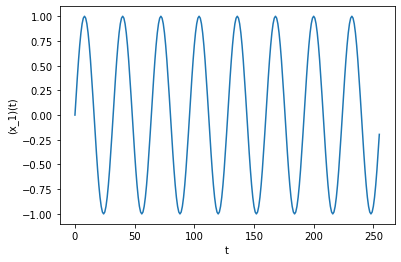

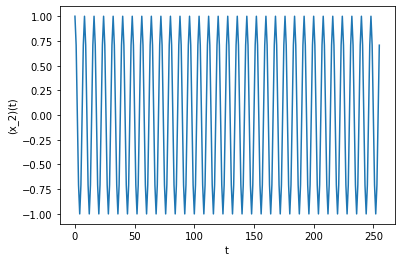

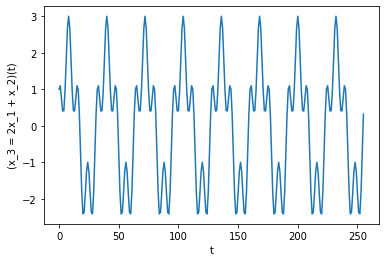

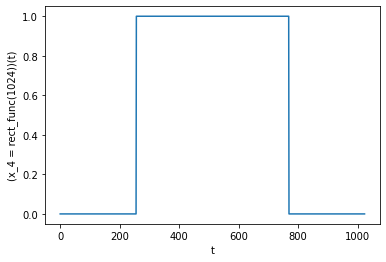

In [78]:
N = 256
M = 8
t = np.arange(N)
plot(t, sin_func(N, M, t), 'x_1')


N = 256
M = 32
plot(t, cos_func(N, M, t), 'x_2')


x3 = 2*sin_func(N, 8, t) + cos_func(N, 32, t)
plot(t, x3, 'x_3 = 2x_1 + x_2')


N = 1024
t = np.arange(N)
plot(t, rect_func(N, t), 'x_4 = rect_func(1024)')

# ت

In [72]:
def ft_top_n_components(x, n, t):
    sp = np.fft.fft(x)
    freq = np.fft.fftfreq(t.size)

    absolute = np.absolute(sp)

    plt.plot(freq, absolute)
    plt.show()

    plt.plot(freq, np.angle(sp))
    plt.show()

    freqs = []
    if n == 0: return freqs

    # sort and put indexes with greater absolutes first
    sp_sorted = np.argsort(absolute)[::-1]  
    
    freqs.append(freq[sp_sorted[0]])
    for i in range(1, 2*n):
        if abs(freq[sp_sorted[i - 1]]/freq[sp_sorted[i]] + 1) < 0.001:
            if abs(absolute[sp_sorted[i - 1]]/absolute[sp_sorted[i]] - 1) < 0.001:

                # to prioritize positive values (not necessary)
                freqs[-1] = abs(freqs[-1])  

                continue

        if len(freqs) == n: break
        freqs.append(freq[sp_sorted[i]])

    return freqs



# دوباره پ

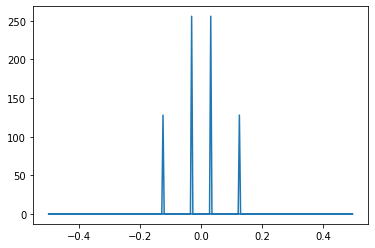

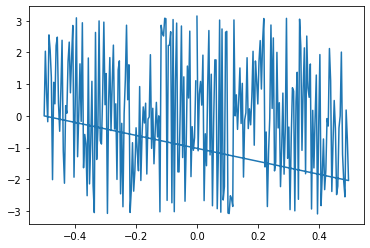

[0.03125, 0.125, -0.21875, 0.22265625]


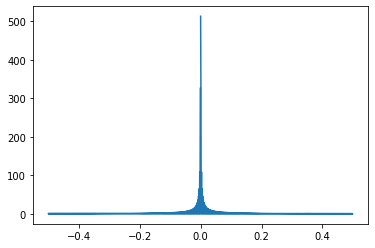

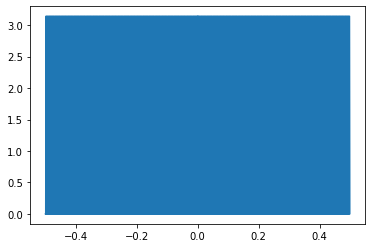

[0.0, 0.0009765625, 0.0029296875, 0.0048828125]


In [73]:
N = 256
t = np.arange(N)
x3 = 2*sin_func(N, 8, t) + cos_func(N, 32, t)
print(ft_top_n_components(x3, 4, t))


N = 1024
t = np.arange(N)
x4 = rect_func(N, t)
print(ft_top_n_components(x4, 4, t))

## توضیح تابع $x_3$
در مورد تابع جمع سینوس و کسینوس نتایج دو فرکانس 
اول کاملا سازگار و درست است و این دو مقدار دقیقا دو مقدار
M/N
هستند که دی جای فرکانس در ورودی سینوس و کسینوس قرار دارد.
8/256 = 0.03125
32/256 = 0.125

چون ضریب سینوس دو برابر ضریب کسینوس است فرکانس آن 
نیز ابتدا آمده

اما در واقعیت هیج فرکانس دیگری نباید وجود داشته باشد چون سیگنال ورودی ترکیب سینوسی خالص است اما به دلیل خطای محاسبات و البته مهم‌تر از آن
بی‌نهایت نبودن سمپلینگ و گسسته بودن فضای مورد بررسی فرکانس‌های دیگری نیز در ادامه آمده‌اند که دامنه‌ی متناظر با آن‌ها صفر نیست اما نسبت به دوتای اول بسیار کوچک است.

تفاوت نمودار نیز با آن چه در درس دیدیم تیزی قله‌های آن است. در تئوری این قله‌ها باید مطلق و دلتای دیراک باشند اما باز به دلیل محدود بودن
sampling
و گسسته کردن یه تابع پیوسته این قله‌ها تیز مطلق نیستند و انحنا دارند و برخی نقاط دیگر نیز به خطا دامنه‌ی غیر صفر دارند.


## توضیح تابع $x_4$ پالس
نمودار این تابع نیز به تقریب نزدیک به تئوری است.
این سیگنال به دلیل این که میانگین آن از محور بالاتر است یک جمله‌ی
DC
(فرکانس صفر)
مثبت دارد.
که تابع نیز به درستی این فرکانس 0 را به عنوان اولین جمله خروجی داده.

بزرگترین جمله‌ی بعدی داخل سری فوریه‌ی این سیگنال
همانطور که در درس نیز دیدیم یه تابع سینوسی است که دوره تناوب آن دقیقا برابر با دوره تناوب خود تابع پالس است.

عبارت این تابع برابر با

$\sin{(2*\pi*(\frac{t}{1024}))}$

است که از آن فرکانس این تابع
1/1024
یا
0.0009765625
نتیجه می‌شود که تابع دقیقا همین مقدار را به عنوان فرکانس دوم نتیجه داده.

فرکانس‌های بعدی جملات تصحیحی بر این دو جمله هستند و مطابق رابطه‌ی تئوری مقدار آن‌ها باید دائما نسبت به قدر مطلق فرکانس نزولی باشد که در نمودار خروجی تابع همینطور هم هست.



# ث

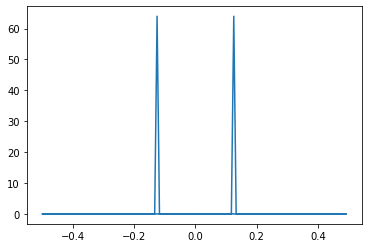

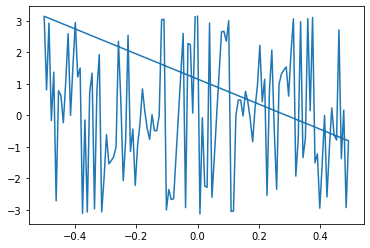

x5: [0.125, 0.4921875, 0.3125, 0.3203125]


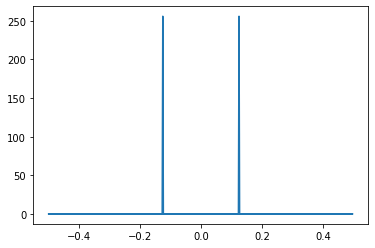

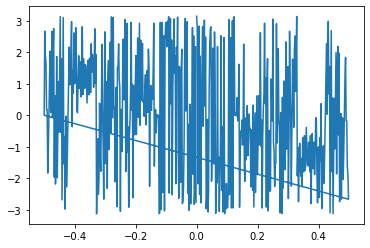

x6: [0.125, 0.328125, 0.421875, 0.326171875]


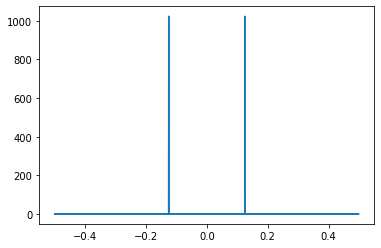

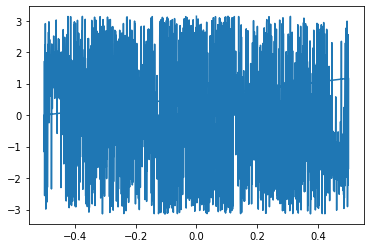

x7: [0.125, 0.23828125, 0.48828125, 0.23779296875]


In [77]:
N = 128
t = np.arange(N)
x5 = cos_func(N, 16, t)
print('x5: ' + str(ft_top_n_components(x5, 4, t)))


N = 512
t = np.arange(N)
x6 = cos_func(N, 64, t)
print('x6: ' + str(ft_top_n_components(x6, 4, t)))

N = 2048
t = np.arange(N)
x7 = cos_func(N, 256, t)
print('x7: ' + str(ft_top_n_components(x7, 4, t)))

همانطور که در بخش قبل نیز توضیح دادم اینجا ما دقیقا همان کار افزایش تعداد نمونه را انجام می‌دهیم و فرکانس را ثابت نگه داشته‌ایم.
اتفاقی که رخ می‌دهد تیزتر شدن تابع تبدیل فوریه به تابع ایده‌آل یعنی دو دلتای دیراک در فرکانس کسینوس‌هاست و در هر مرحله نمودار مشاهده می‌کنیم که قله‌ها تیزتر می‌شوند.

# ج

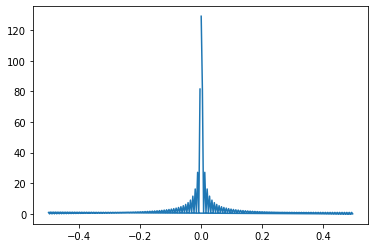

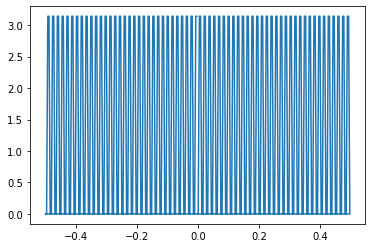

x8: [0.0, 0.00390625, 0.01171875, 0.01953125]


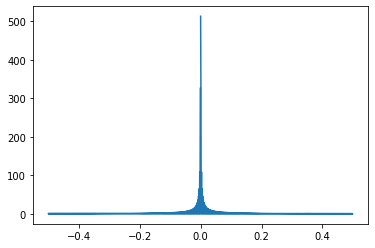

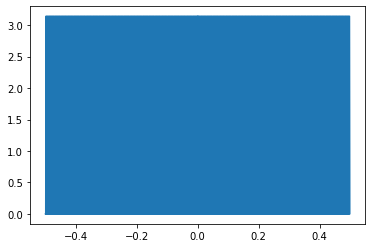

x9: [0.0, 0.0009765625, 0.0029296875, 0.0048828125]


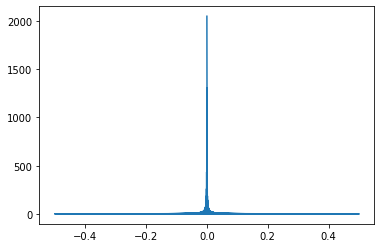

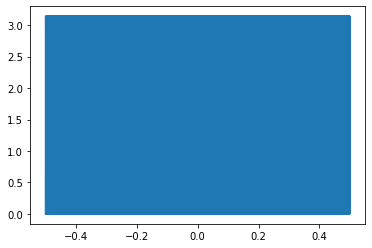

x10: [0.0, 0.000244140625, 0.000732421875, 0.001220703125]


In [79]:
N = 256
t = np.arange(N)
x8 = rect_func(N, t)
print('x8: ' + str(ft_top_n_components(x8, 4, t)))

N = 1024
t = np.arange(N)
x9 = rect_func(N, t)
print('x9: ' + str(ft_top_n_components(x9, 4, t)))

N = 4096
t = np.arange(N)
x10 = rect_func(N, t)
print('x10: ' + str(ft_top_n_components(x10, 4, t)))

در این جا ما فرکانس پالس‌ها را تغییر دادیم اما اتفاق جالبی که می‌افتد این است که چون در محور زمان پالس‌ها را با ضریب چهار کشیده ایم و دوره تناوب را چهار برابر کردیم.
در واقع فرکانس پایه را در هر مرحله تقسیم بر چهار کردیم و در خروجی تبدیل فوریه‌ی پالس اول اگر همه‌ی فرکانس‌ها را بر چهار تقسیم کنیم تبدیل فوریه‌ی تابع دوم بدست خواهد آمد.

البته چون تبدیل فوریه هر بار جمع‌تر هم می‌شود ممکن است در انتهای بازه‌ها که دامنه‌ها نزدیک به صفر است به دلیل خطاهای محاسبه اختلاف‌هایی بوجود آید.

اما فرکانس‌های نزدیک به صفر که دامنه‌ی آن‌ها بزرگ است باید دقیقا رابطه برقرار باشد.

این فرکانس‌ها با دامنه‌ی بزرگ در پالس دقیقا به ترتیب همان‌هایی هستند که تابع ما خروجی می‌دهد که مطابق انتظار چهار فرکانس خروجی تابع در هر مرحله هر کدام تقسیم بر چهار شده اند.
البته این موضوع طبعا فرکانس صفر را همان صفر نگه می‌دارد.

0 => 0 => 0

0.00390625 => 0.0009765625 => 0.000244140625

0.01171875 => 0.0029296875 => 0.000732421875

0.01953125 => 0.0048828125 => 0.001220703125

که به طرز خوش‌حال کننده‌ای تابع همین نسبت تساعد را در خروجی‌هایش رعایت کرده است.

